# Student Campus-Placement Prediction

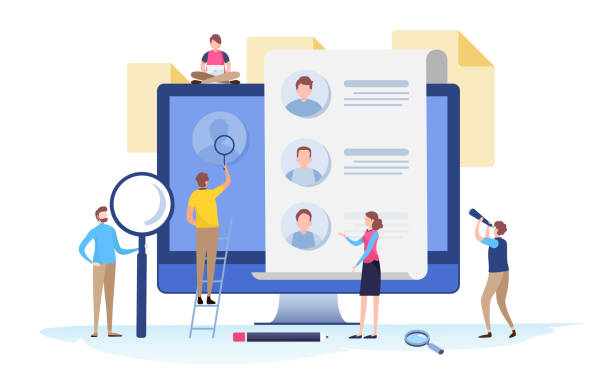

- All students dream to obtain a job offer in their hands before they leave their college. A placement chance predictor helps students to have
an idea about where they stand and what to be done to obtain a good placement. 
- Placement of scholars is one in every of the vital activities in academic establishments. Hence all institutions strive to strengthen placement departments. 
- In this module, the objective is to analyze previous year’s student’s data and use it to predict the placement chance of the current students using K-Nearest Neighbors Algorithm.

Click on this link to download the dataset we'll be using: 

https://drive.google.com/uc?export=download&id=1Agfd4U_JixUVzNNeY4_gvlqnvsU_YbH5

In [1]:
# Importing essential libraries for data understanding and Exploratory Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset files
url = "https://drive.google.com/uc?export=download&id=1Agfd4U_JixUVzNNeY4_gvlqnvsU_YbH5"

## Variables

In [3]:
# importing dataset using pandas function
df = pd.read_csv(url)
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [4]:
# print the columns(feature variables) of the dataset
df.columns

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')

'PlaceOrNot' is our dependent/target variable which we are going to predict and others are independent variable.

## Missing Data

In [5]:
# To check the missing data
df.isnull()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2961,False,False,False,False,False,False,False,False
2962,False,False,False,False,False,False,False,False
2963,False,False,False,False,False,False,False,False
2964,False,False,False,False,False,False,False,False


In [6]:
# to check total missing values each column
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

It shows that we don't have any missing values in any columns. 

## Data Types

In [7]:
# To check the data types of each column
df.dtypes

Age                   int64
Gender               object
Stream               object
Internships           int64
CGPA                  int64
Hostel                int64
HistoryOfBacklogs     int64
PlacedOrNot           int64
dtype: object

## EDA - Univariate Analysis
If we analyze data over a single variable/column from a dataset, it is known as Univariate Analysis.

<AxesSubplot:ylabel='PlacedOrNot'>

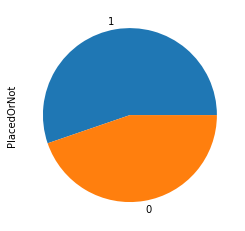

In [8]:
# To check percentage of PlacedOrNot and plot a pie chart
df['PlacedOrNot'].value_counts().plot.pie()

In [9]:
# To check percentage count of Internships variable
df['Internships'].value_counts()

0    1331
1    1234
2     350
3      51
Name: Internships, dtype: int64

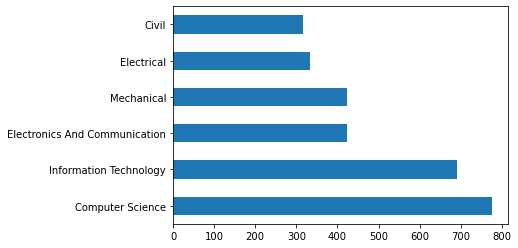

In [10]:
#plot the bar graph of count of STREAM
df['Stream'].value_counts().plot.barh()
plt.show()

In [11]:
# If the column or variable is of numerical then we’ll analyze by calculating its mean, median, std, etc.
df.CGPA.describe()

count    2966.000000
mean        7.073837
std         0.967748
min         5.000000
25%         6.000000
50%         7.000000
75%         8.000000
max         9.000000
Name: CGPA, dtype: float64

## EDA - Bivariate Analysis
If we analyze data by taking two variables into consideration from a dataset, it is known as Bivariate Analysis.

In [12]:
# Check the count distribution of target_variables accross History of Backlogs
df.groupby(['HistoryOfBacklogs'])['PlacedOrNot'].value_counts()

HistoryOfBacklogs  PlacedOrNot
0                  1              1337
                   0              1059
1                  1               302
                   0               268
Name: PlacedOrNot, dtype: int64

From Above Observation, we can say that, only History of Backlogs doesn't affect your placement chances. The trend is similar for both classes of "HistoryOfBacklogs" column.

<AxesSubplot:xlabel='Gender'>

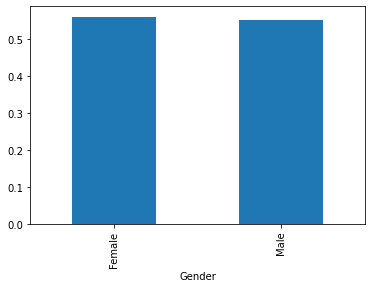

In [13]:
# Check the mean distribution of target_variables accross gender
df.groupby(['Gender'])['PlacedOrNot'].mean().plot.bar()

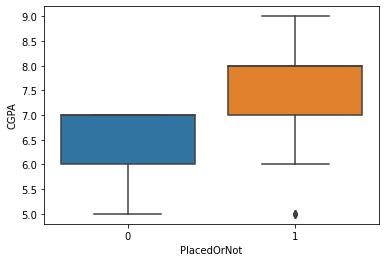

In [14]:
# create a box plot for CGPA vs PlacedOrNot
sns.boxplot(y=df.CGPA, x=df.PlacedOrNot)
plt.show()

What is a Box Plot?

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. 

For example, we can see an outlier that there's a case where engineering student with low CGPA is placed.

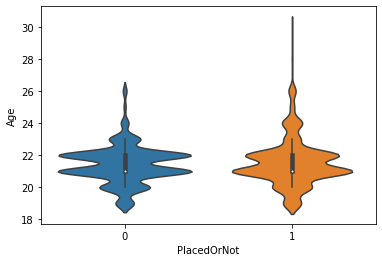

In [15]:
# create a violin plot for AGE vs PlacedOrNot
sns.violinplot(x=df.PlacedOrNot, y=df.Age)
plt.show()

## EDA - Multivariate Analysis
If we analyze data by taking more than two variables/columns into consideration from a dataset, it is known as Multivariate Analysis.

Stream     Civil  Computer Science  Electrical  Electronics And Communication  \
CGPA                                                                            
5       0.000000          0.142857    0.000000                       0.000000   
6       0.216495          0.412844    0.160920                       0.283186   
7       0.073684          0.353383    0.396396                       0.406897   
8       1.000000          1.000000    1.000000                       1.000000   
9       1.000000          1.000000    1.000000                       1.000000   

Stream  Information Technology  Mechanical  
CGPA                                        
5                     0.130435    0.000000  
6                     0.411168    0.262295  
7                     0.314554    0.087302  
8                     1.000000    1.000000  
9                     1.000000    1.000000  



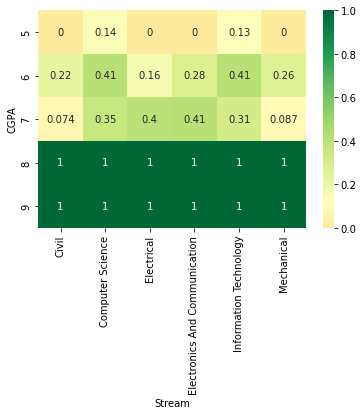

In [16]:
# create pivot table of CGPA vs Stream vs PlacedOrNot
result = pd.pivot_table(data=df, index='CGPA',
                       columns="Stream", values='PlacedOrNot')
print(result)
print("======================================================")
print()

# create heat map for the same
sns.heatmap(result, annot=True, cmap='RdYlGn', center=0.117)
plt.show()

The above heatmaps sums up everything:
- If you have CGPA more than 7, then your chances of placement is very high(almost 1)
- If you've low CGPA, then unless you're in Computer Science or IT Stream, you've chances of getting placed.
- For average CGPA, your chances depends on your Stream.

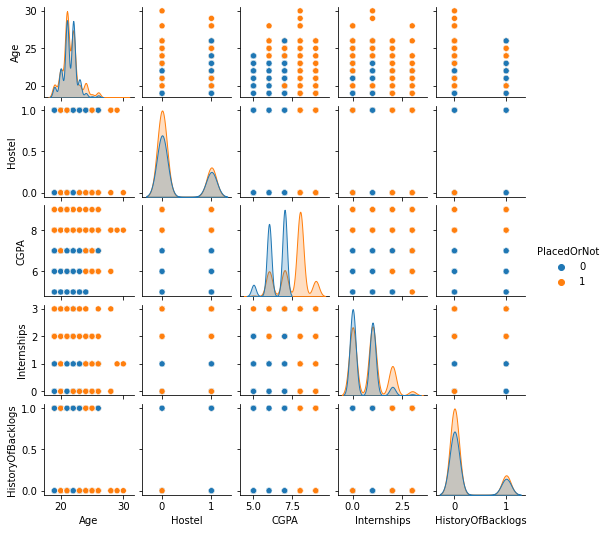

In [17]:
# create a pairplot with the target variable as a class for segmentation
sns.pairplot(df[['Age', 'Hostel', 'Stream', 'CGPA', 'Internships', 'HistoryOfBacklogs', 'PlacedOrNot']],
            hue = 'PlacedOrNot', height=1.5)
plt.show()

## Data Preprocessing

### Encoding Categories
Encoding categorical variables is very important if not crucial this is because machine learning models are mathematical models that use algorithms that work with numerical data types. This is why, we need encoding methods to convert non-numerical data to meaningful numerical data. For this we look at Pandas get_dummies method.

In [18]:
# create dummies for categorical variables
dummies = pd.get_dummies(df[['Gender', 'Stream']])

# concat the created dummies with the original df and drop those categorical columns
encoded_df = pd.concat([df, dummies], axis=1)
encoded_df.drop(['Gender', 'Stream'], axis=1, inplace=True)
encoded_df.head()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Gender_Female,Gender_Male,Stream_Civil,Stream_Computer Science,Stream_Electrical,Stream_Electronics And Communication,Stream_Information Technology,Stream_Mechanical
0,22,1,8,1,1,1,0,1,0,0,0,1,0,0
1,21,0,7,1,1,1,1,0,0,1,0,0,0,0
2,22,1,6,0,0,1,1,0,0,0,0,0,1,0
3,21,0,8,0,1,1,0,1,0,0,0,0,1,0
4,22,0,8,1,0,1,0,1,0,0,0,0,0,1


In [19]:
# Creating X and Y
y = encoded_df['PlacedOrNot']
X = encoded_df.drop(['PlacedOrNot'], axis=1)
print(X.head())
print("======================================================")
print()

print(y.head())

   Age  Internships  CGPA  Hostel  HistoryOfBacklogs  Gender_Female  \
0   22            1     8       1                  1              0   
1   21            0     7       1                  1              1   
2   22            1     6       0                  0              1   
3   21            0     8       0                  1              0   
4   22            0     8       1                  0              0   

   Gender_Male  Stream_Civil  Stream_Computer Science  Stream_Electrical  \
0            1             0                        0                  0   
1            0             0                        1                  0   
2            0             0                        0                  0   
3            1             0                        0                  0   
4            1             0                        0                  0   

   Stream_Electronics And Communication  Stream_Information Technology  \
0                                     1   

In [20]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [21]:
# Splitting Data into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.25,
                                                   random_state=2)

# K-NN Classification - Baseline Model Fitting

### Model without finding best K

In [22]:
# Build model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Evaluate train accuracy
base_model = KNeighborsClassifier()
base_model.fit(X_train, y_train)

# Evaluate test accuracy
print("Train Accuracy :", base_model.score(X_train, y_train))
print()

print("Test Accuracy :", base_model.score(X_test, y_test))

Train Accuracy : 0.8660071942446043

Test Accuracy : 0.8355795148247979


### Find best K
Derive a plot between error rate and K denoting values in a defined range. Then
choose the K value as having a minimum error rate.

In [23]:
# Use KFold cross-validation to find best K, also storing kfold test accuracies for plotting graph 
# initialize model, perform kfold for each value of K, store accuracy scores
from sklearn.model_selection import KFold

Accuracy_scores = []
max_train_score, max_test_score = 0, 0
for k in range(3, 50):
    # Initial model
    base_model = KNeighborsClassifier(n_neighbors=k)
    n_splits = 5
    kf = KFold(n_splits=n_splits, random_state=None)
    acc_score = []
    for train_index, test_index in kf.split(X_train):
        X_train_kf, X_test_kf = X_train[train_index], X_train[test_index]
        
        y_train_kf, y_test_kf = y_train.iloc[train_index], y_train.iloc[test_index]
        
        base_model.fit(X_train_kf, y_train_kf)
        pred_values = base_model.predict(X_test_kf)
        acc = accuracy_score(pred_values, y_test_kf)
        acc_score.append(acc)
    
    avg_acc_score = sum(acc_score)/n_splits
    
    # Store the accuracy scores
    Accuracy_scores.append(avg_acc_score)
    
best_k = 3 + Accuracy_scores.index(max(Accuracy_scores))

# print maximum kfold cross validation accuracy and best value of K
print("Maximum k-fold accuracy obtained is : ", max(Accuracy_scores), "for value of K = ", best_k)

Maximum k-fold accuracy obtained is :  0.8174541957688024 for value of K =  9


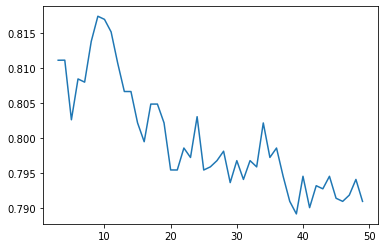

In [24]:
# plot graph of best K graph - Test Accuracy score vs K neighbors
plt.plot([k for k in range(3, 50)], Accuracy_scores)
plt.show()

In [25]:
# Build model with Best K value and evaluate its train and test accuracy
KNN = KNeighborsClassifier(n_neighbors=best_k)
KNN.fit(X_train, y_train)

# Evaluate train accuracy
print("Train Accuracy :", KNN.score(X_train, y_train))
print()

# Evaluate test accuracy
print("Test Accuracy :", KNN.score(X_test, y_test))

Train Accuracy : 0.8628597122302158

Test Accuracy : 0.8477088948787062


## KNN using GridSearchCV
Let's see, How can we make this task easy with GridSearchCV and also get higher accuracy score.

## Grid SearchCV - Hyperparameter tuning using grid search and cross validation 
GridSearchCV is a useful tool to fine tune the parameters of your model. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. As we know that before training the model with data, we divide the data into two parts – train data and test data. In cross-validation, the process divides the train data further into two parts – the train data and the validation data.

The most popular type of Cross-validation is K-fold Cross-Validation. It is an iterative process that divides the train data into k partitions. Each iteration keeps one partition for testing and the remaining k-1 partitions for training the model. The next iteration will set the next partition as test data and the remaining k-1 as train data and so on. In each iteration, it will record the performance of the model and at the end give the average of all the performance. Thus, it is also a time-consuming process.

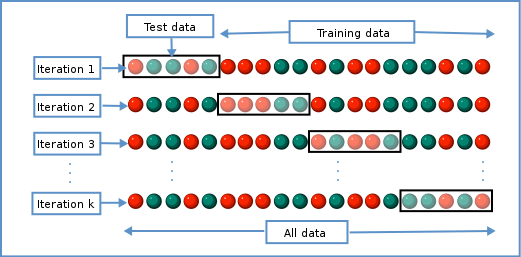
<center> K-Fold Cross Validation (Image by Gufosowa from WikiMedia) </center>

Thus, GridSearch along with cross-validation takes huge time cumulatively to evaluate the best hyperparameters. Now we will see how to use GridSearchCV in our Machine Learning project.

In [26]:
# set parameters for gridsearch
parameters = {'n_neighbors': [i for i in range(3, 35)],
             'p' : [1, 2]}

# p=2 is Euclidean Distance
# P=1 is Manhattan Distance 
#(Calculated as the sum of the absolute differences between the two vectors)

KNN = KNeighborsClassifier()

In [27]:
# Perform GridSearchCV to tune parameters for best KNN fit 
from sklearn.model_selection import GridSearchCV

knn_cv = GridSearchCV(KNN, parameters, cv=5)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30, 31, 32, ...],
                         'p': [1, 2]})

In [28]:
# View the best parameters and accuracy for the model found using grid search
print("Tuned Hyperparameters :(best parameters) ", knn_cv.best_params_)
print()

print("Accuracy :", knn_cv.best_score_)

Tuned Hyperparameters :(best parameters)  {'n_neighbors': 10, 'p': 1}

Accuracy : 0.836332624759591


### Analyzing train and test metrics

In [29]:
# check train accuracy now
accuracy_score(knn_cv.predict(X_train), y_train)

0.8664568345323741

In [30]:
# check test accuracy now
accuracy_score(knn_cv.predict(X_test), y_test)

0.8652291105121294

### Conclusion
We managed to very well increase our Accuracy using GridSearchCV and also found best parameters for our model and that too very quickly without much efforts.